In [1]:
#Question 1
import requests

url = "https://free-phone-number-lookup-and-validation-api1.p.rapidapi.com/json"

querystring = {"number":"12134635888"}

headers = {
	"X-RapidAPI-Key": "737db4c732msh6808b0d41755dfbp1890c4jsn1781b167b094",
	"X-RapidAPI-Host": "free-phone-number-lookup-and-validation-api1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'query': '12134635888', 'status': 'success', 'numberType': 'FIXED LINE OR MOBILE', 'numberValid': True, 'numberValidForRegion': True, 'numberCountryCode': 1, 'numberAreaCode': 213, 'ext': None, 'formatE164': '+12134635888', 'formatNational': '(213) 463-5888', 'formatInternational': '+1 213-463-5888', 'dialFromCountryCode': 'US', 'dialFromCountryNumber': '1 (213) 463-5888', 'carrier': None, 'continent': 'North America', 'continentCode': 'NA', 'country': 'US', 'countryName': 'United States', 'region': 'CA', 'regionName': 'California', 'city': 'Los Angeles', 'zip': '90009', 'lat': 34.052, 'lon': -118.244, 'timezone': 'America/Los_Angeles', 'offset': -25200, 'currency': 'USD'}


In [2]:
import requests

def fetch_data():
    phone_number = input("Enter a phone number: ")
    url = "https://free-phone-number-lookup-and-validation-api1.p.rapidapi.com/json"
    querystring = {"number": phone_number}
    headers = {
        "X-RapidAPI-Key": "737db4c732msh6808b0d41755dfbp1890c4jsn1781b167b094",
        "X-RapidAPI-Host": "free-phone-number-lookup-and-validation-api1.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        data = response.json()
        display_data(data)
    else:
        print(f"Failed to fetch data: {response.status_code}")

def display_data(data):
    print("Phone Number Information:")
    for key, value in data.items():
        print(f"{key}: {value}")

# Fetch and display data
fetch_data()


Enter a phone number: 287291
Phone Number Information:
query: 287291
status: fail
message: invalid country
numberType: invalid
numberValid: False


In [3]:
#question 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data =pd.read_csv("/content/diabetes.csv")

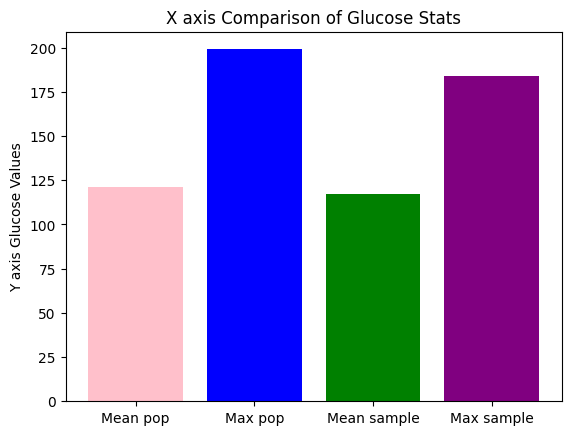

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a variable named 'dataset'

# Set seed for reproducibility
np.random.seed(642)

# Take a random sample of 25 observations
sample_value = data.sample(25)

# Compute population statistics for Glucose
gluco_mean = data['Glucose'].mean()
max_gluco = data['Glucose'].max()

# Compute sample statistics for Glucose
mean_sample = sample_value['Glucose'].mean()
max_sample = sample_value['Glucose'].max()

# Create a bar chart for comparison
sample_attributes = ['Mean pop', 'Max pop', 'Mean sample', 'Max sample']
sample_values = [gluco_mean, max_gluco, mean_sample, max_sample]

plt.bar(sample_attributes, sample_values, color=['pink', 'blue', 'green', 'purple'])
plt.title('X axis Comparison of Glucose Stats')
plt.ylabel('Y axis Glucose Values')
plt.show()


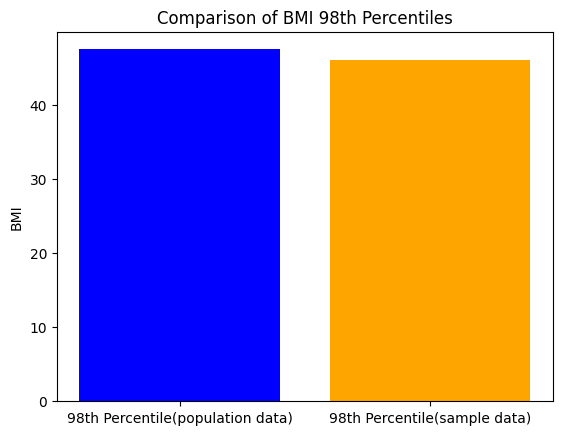

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute population 98th percentile for BMI
percentile_of_population = np.percentile(data['BMI'], 98)

# Compute sample 98th percentile for BMI
percentile_of_sample = np.percentile(sample_value['BMI'], 98)

# Create a bar chart for comparison
sample_attributes = ['98th Percentile(population data)', '98th Percentile(sample data)']
sample_values = [percentile_of_population, percentile_of_sample]

plt.bar(sample_attributes, sample_values, color=['blue', 'orange'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI')
plt.show()


In [19]:
sample_bootstarp_value = 500
sample_size = 150


mean_value_bootstarp = np.zeros(sample_bootstarp_value)
standard_deviation_bootstarp = np.zeros(sample_bootstarp_value)
percentile_bootstarp = np.zeros(sample_bootstarp_value)


for i in range(sample_bootstarp_value):
    btstrap_sample = data['BloodPressure'].sample(sample_size, replace=True)
    mean_value_bootstarp[i] = btstrap_sample.mean()
    standard_deviation_bootstarp[i] = btstrap_sample.std()
    percentile_bootstarp[i] = np.percentile(btstrap_sample, 98)


mean_value_pop = data['BloodPressure'].mean()
std_dev_value_pop = data['BloodPressure'].std()
percentile_value_pop = np.percentile(data['BloodPressure'], 98)


bstrpmean=np.mean(mean_value_bootstarp)
bstrpd=np.mean(standard_deviation_bootstarp)
bstrp=np.mean(percentile_bootstarp)

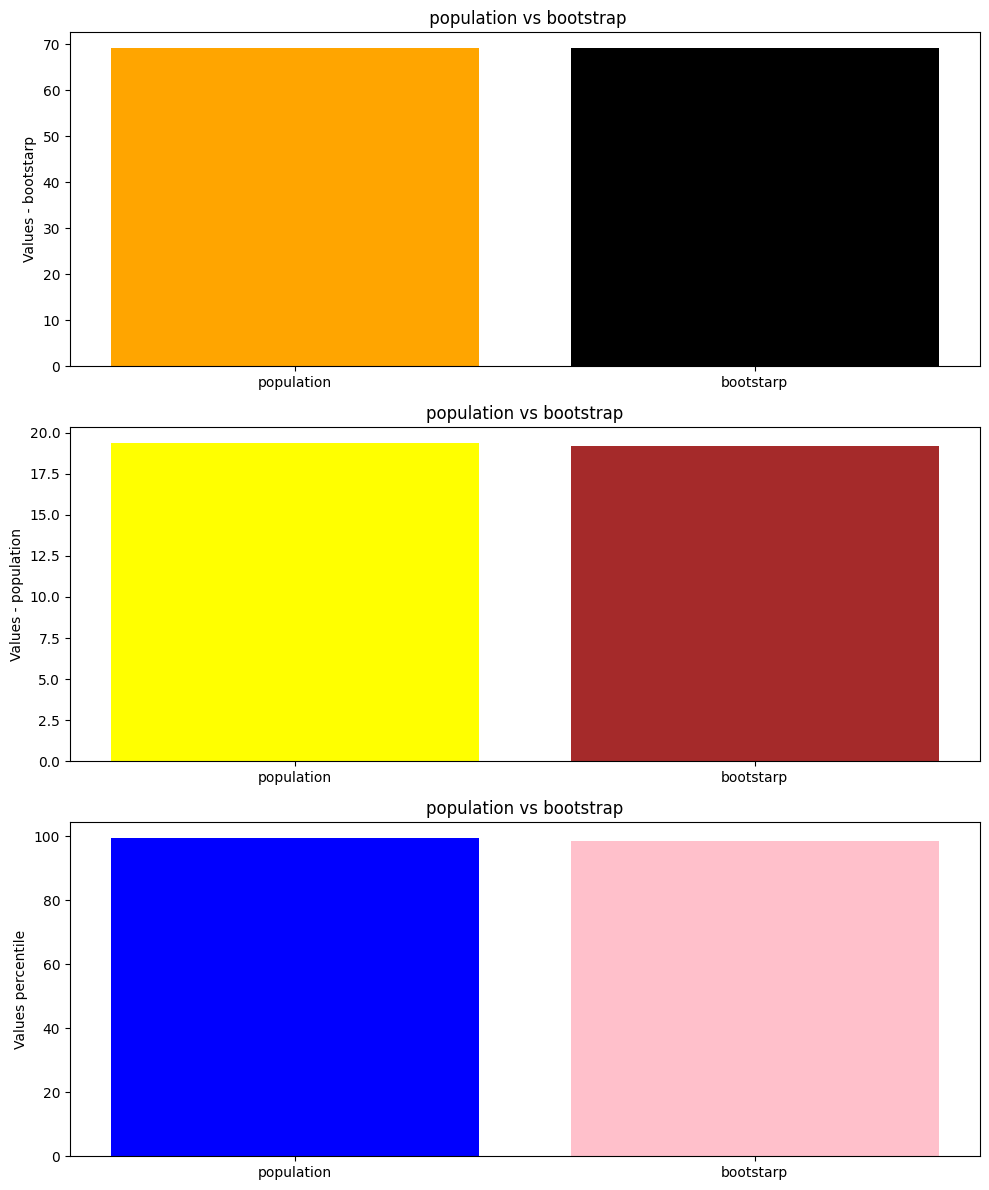

In [21]:
fig, axis = plt.subplots(3, 1, figsize=(10, 12))


axis[0].bar(['population', 'bootstarp'], [mean_value_pop, bstrpmean], color=['orange', 'black'])
axis[0].set_ylabel('Values - bootstarp')
axis[0].set_title(' population vs bootstrap')


axis[1].bar(['population', 'bootstarp'], [std_dev_value_pop, bstrpd], color=['yellow', 'brown'])
axis[1].set_ylabel('Values - population')
axis[1].set_title('population vs bootstrap')


axis[2].bar(['population', 'bootstarp'], [percentile_value_pop, bstrp], color=['blue', 'pink'])
axis[2].set_ylabel('Values percentile')
axis[2].set_title('population vs bootstrap')

plt.tight_layout()
plt.show()